In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r'C:\Users\dell\Desktop\python specialclass\MLproject-weekends\Heart Attack Analysis & Prediction Dataset\heart.csv')
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


About this dataset:

age : Age of the patient

Sex : Sex of the patient

cp : Chest Pain type chest pain type: Value 0: typical angina, Value 1: atypical angina, Value 2: non-anginal pain, Value 3: asymptomatic

trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

restecg : resting electrocardiographic results: Value 0: normal, Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria.

thalachh : maximum heart rate achieved

exng: exercise induced angina (1 = yes; 0 = no)

oldpeak: ST depression induced by exercise relative to rest (S-T segment, segment on the ECG that lies between the end of the S wave and the start of the T wave).

slp: the slope of the peak exercise ST segment, 0 = unsloping, 1 = flat, 2 = downsloping.

caa: number of major vessels (0-3).

thall: thalassemia: 0 = null, 1 = fixed defect, 2 = normal, 3 = reversable defect

target : 0= less chance of heart attack 1= more chance of heart attack


In [3]:
new_columns=['age','sex','cp','trtbps','chol','fbs','rest_ecg','thalach','exang','oldpeak','slope','ca','thal','target']

In [4]:
data.columns=new_columns

In [5]:
data

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [6]:
data.shape

(303, 14)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   rest_ecg  303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [9]:
data.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
rest_ecg    0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
na_sum=[]
for i in data.columns:
    a=data[i].isna().sum()
    na_sum.append(a)
print(a)
print(na_sum)

0
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [11]:
pd.DataFrame(na_sum,index=data.columns,columns=['Null_Values'])

,Null_Values
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
rest_ecg,0
thalach,0
exang,0
oldpeak,0


<AxesSubplot:>

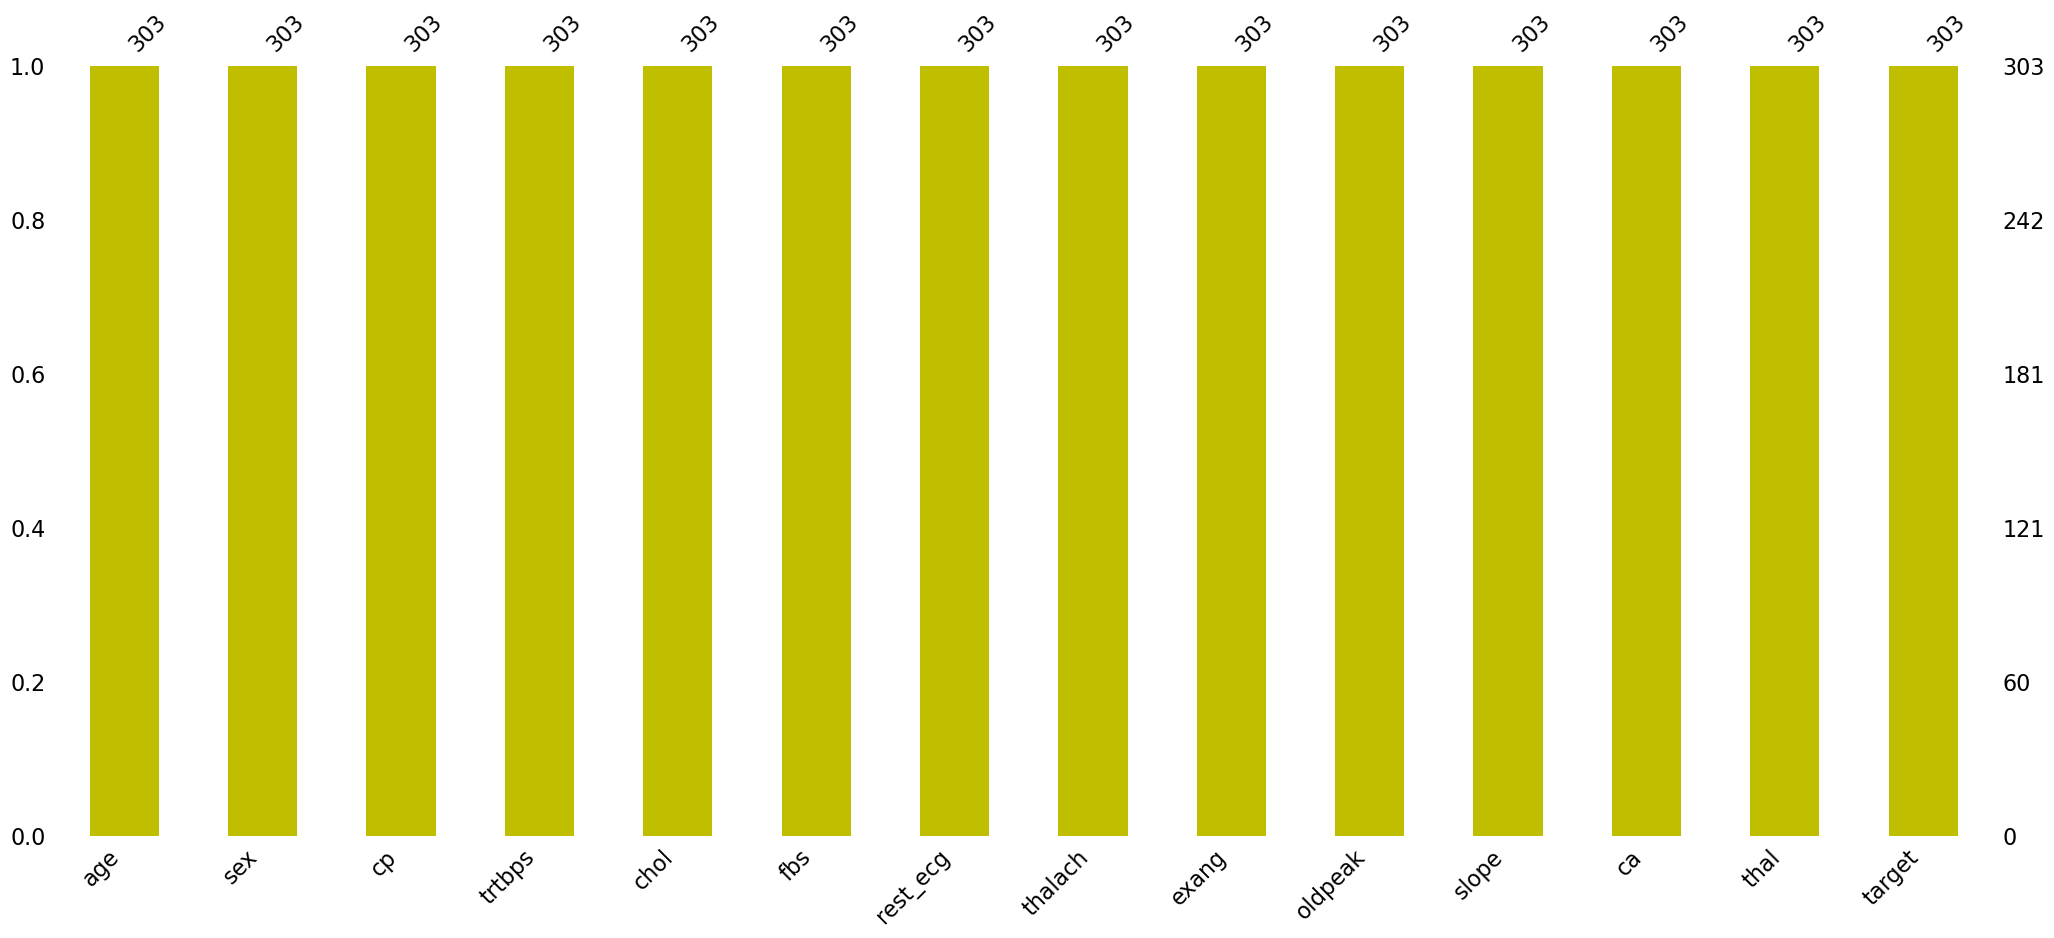

In [12]:
import missingno
missingno.bar(data,color='y')

In [13]:
data['cp'].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [14]:
data['cp'].value_counts().sum()

303

In [15]:
data['cp'].value_counts().count()

4

In [16]:
unique_no=[]
for i in data.columns:
    a=data[i].value_counts().count()
    unique_no.append(a)
print(unique_no)

[41, 2, 4, 49, 152, 2, 3, 91, 2, 40, 3, 5, 4, 2]


In [17]:
pd.DataFrame(unique_no,index=data.columns,columns=['Count of Unique_Values'])

,Count of Unique_Values
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
rest_ecg,3
thalach,91
exang,2
oldpeak,40


In [18]:
# Let us seperate the categorical and the numeric variables
data.head()

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [19]:
categorical_variables=['sex','cp','fbs','rest_ecg','exang','slope','ca','thal','target']
num_variables=['age','trtbps','chol','thalach','oldpeak']

In [20]:
data[num_variables].describe()

,age,trtbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


In [21]:
# The mean of the 'age' variable is almost equal to (1st quartile+3rd quartile)/2, also very near to the average of min+max.
# It will be a normally distributed variable.

# The mean of 'trtbps' variable is almost equal to average of 1st quartile+3rd quartile, also not far away the average of min+max.
# It will also be a normally distributed variable slightly skewed to the right.

# The mean of 'chol' variable is slightly higher (though very very near) to the average of the 1st quartile+3rd quartile.
# However, it is far from the average of min+max. So though normally distributed but will be skewed to the right, due to max
# which can be seen as an outlier.

# The mean of the'thalach' variable is very close to the average of 1st quartile+3rd quartile. Wrt the average of min+max,
# the mean though not far away but is slightly higher. So, a bit of left skewness can be observed here. 

# The mean of the 'oldpeak' variable is quite higher than the average of 1st quartile+3rd quartile. Wrt the average of min+max
# the mean is quite far away. So it will be a right skewed distribution, with a good amount of skewness.

<AxesSubplot:xlabel='age', ylabel='Density'>

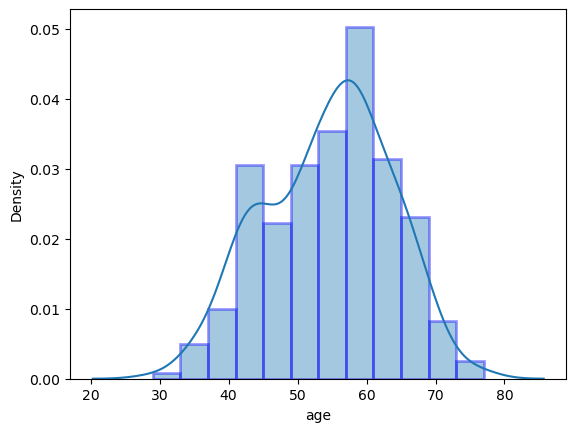

In [22]:
sns.distplot(data['age'],hist_kws=dict(linewidth=2,edgecolor='b'))
# Normally distributed variable 

<AxesSubplot:xlabel='trtbps', ylabel='Density'>

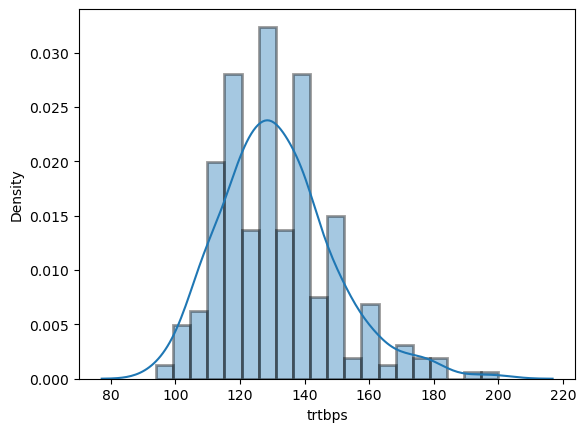

In [23]:
sns.distplot(data['trtbps'],hist_kws=dict(linewidth=2,edgecolor='k'),bins=20)
# So it is slightly skewed to the right.

<AxesSubplot:xlabel='chol', ylabel='Density'>

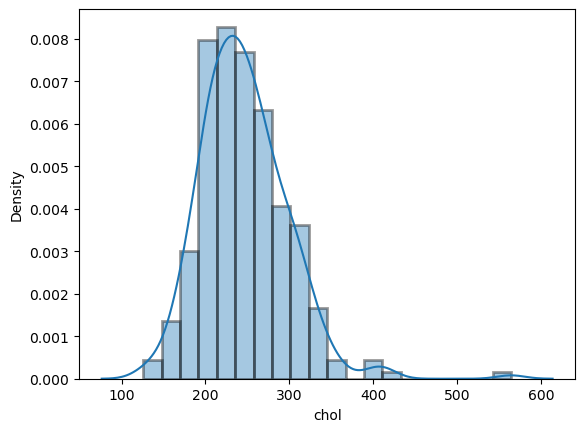

In [24]:
sns.distplot(data['chol'],hist_kws=dict(linewidth=2,edgecolor='k'),bins=20)
# So, skewed to the right.

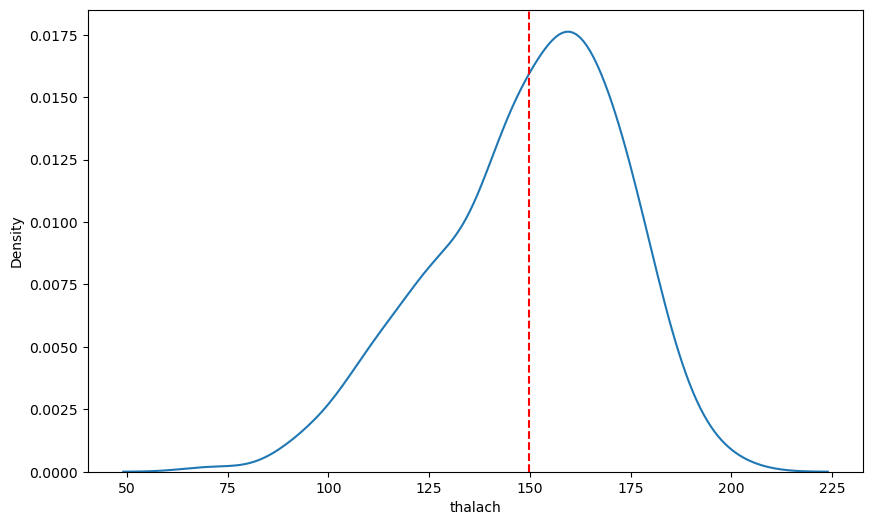

In [25]:
x,y=plt.subplots(figsize=(10,6))
sns.distplot(data['thalach'],hist=False,ax=y)
y.axvline(data['thalach'].mean(),color='r',ls='--')
# The red vertical line corresponds to mean. So, normally distributed but slightly skewed to the left.

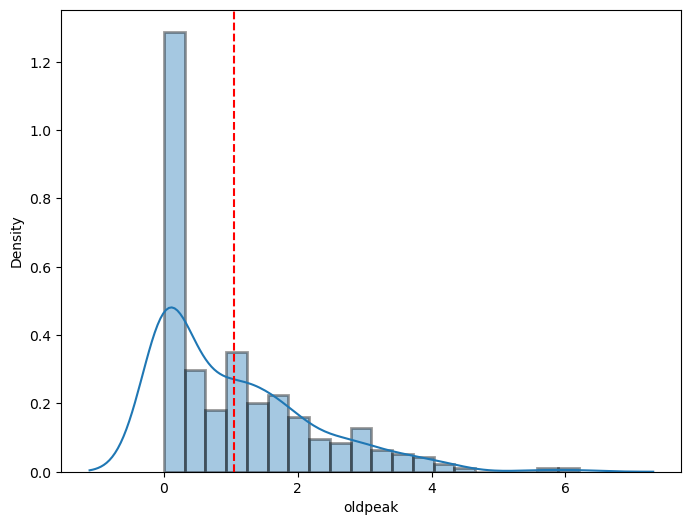

In [26]:
x,y=plt.subplots(figsize=(8,6))
sns.distplot(data['oldpeak'],hist_kws=dict(linewidth=2,edgecolor='k'),bins=20,ax=y)
y.axvline(data['oldpeak'].mean(),color='r',ls='--')
# Right skewed distribution, with a pretty high order of skewness.

In [27]:
axis_names=['Patient Age','Resting bp','Cholestrol','Highest Heart Rate','ST Depression']
b=list(zip(num_variables,axis_names))
b

[('age', 'Patient Age'),
 ('trtbps', 'Resting bp'),
 ('chol', 'Cholestrol'),
 ('thalach', 'Highest Heart Rate'),
 ('oldpeak', 'ST Depression')]

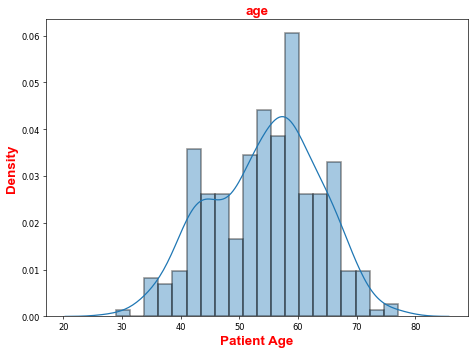

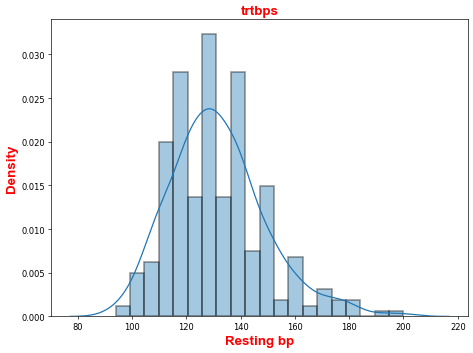

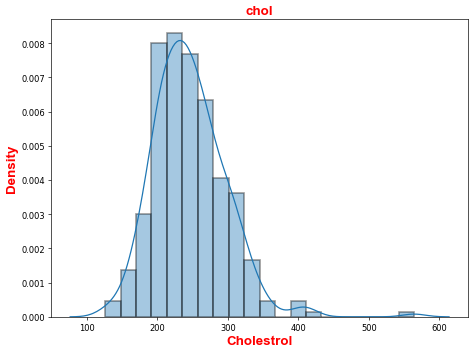

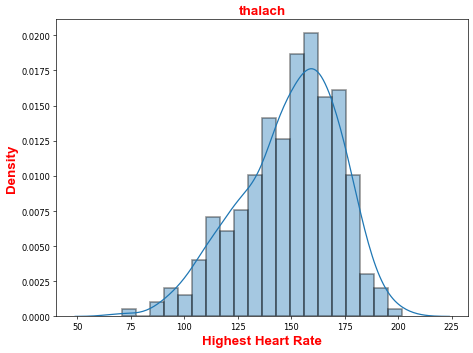

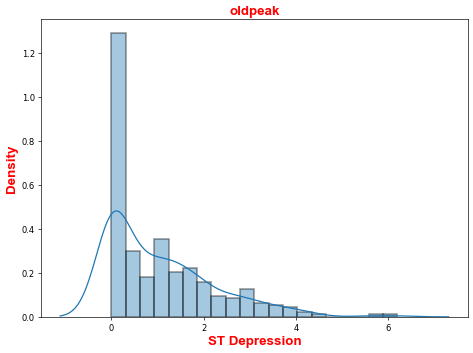

In [28]:
font_title={'family':'arial','color':'red','weight':'bold','size':16}
font_axis={'family':'arial','color':'red','weight':'bold','size':16}
for i,j in b:
    plt.figure(figsize=(8,6),dpi=60)
    sns.distplot(data[i],hist_kws=dict(linewidth=2,edgecolor='k'),bins=20)
    plt.title(i,fontdict=font_title)
    plt.xlabel(j,fontdict=font_axis)
    plt.ylabel("Density",fontdict=font_axis)
    plt.tight_layout()
    plt.show()

In [29]:
categorical_variables

['sex', 'cp', 'fbs', 'rest_ecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [30]:
data['cp'].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [31]:
list(data['cp'].value_counts().index)

[0, 2, 1, 3]

In [32]:
list(data['cp'].value_counts())

[143, 87, 50, 23]

In [33]:
categorical_axis_names=['Gender','Type of Chest Pain','Fasting BS','Resting ECG Results','Exercise Induced Agina','ST Segment Slope',
                       'No of Major Vessels','THAL','TARGET']
b=list(zip(categorical_variables,categorical_axis_names))
b

[('sex', 'Gender'),
 ('cp', 'Type of Chest Pain'),
 ('fbs', 'Fasting BS'),
 ('rest_ecg', 'Resting ECG Results'),
 ('exang', 'Exercise Induced Agina'),
 ('slope', 'ST Segment Slope'),
 ('ca', 'No of Major Vessels'),
 ('thal', 'THAL'),
 ('target', 'TARGET')]

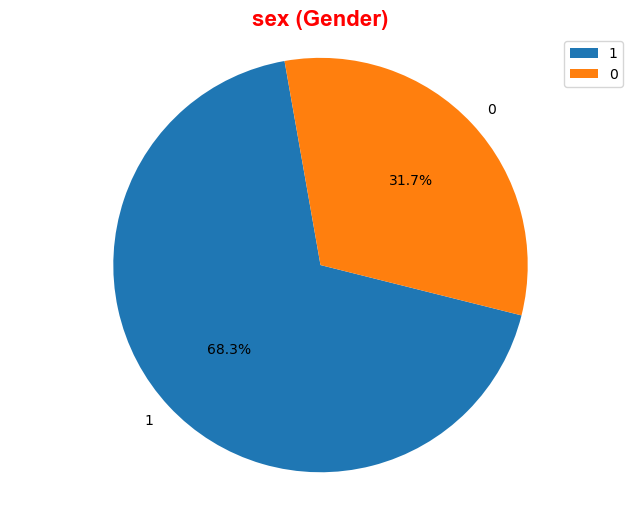

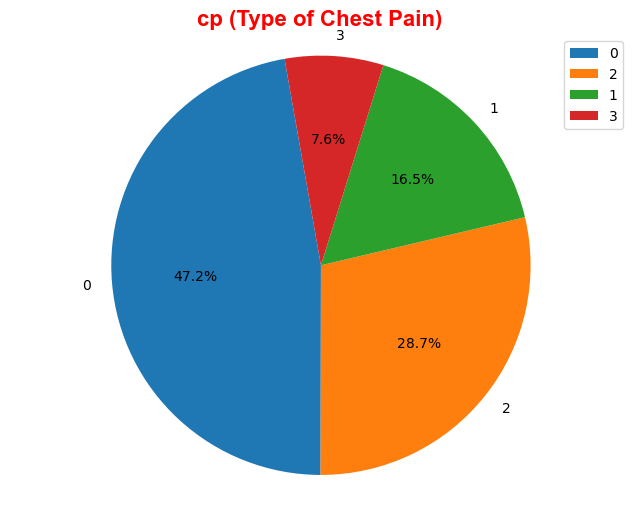

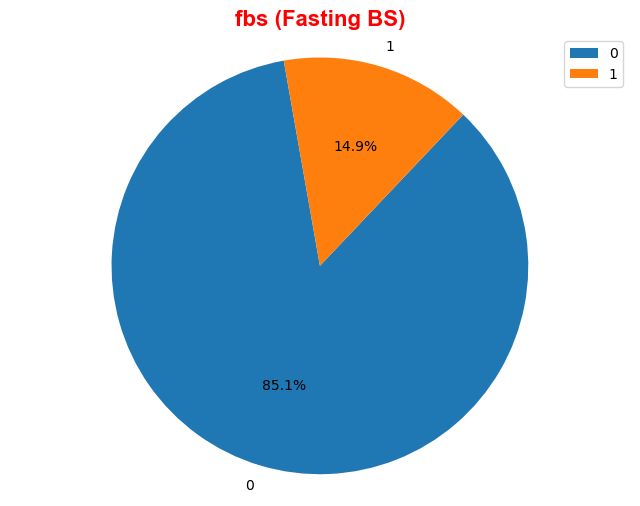

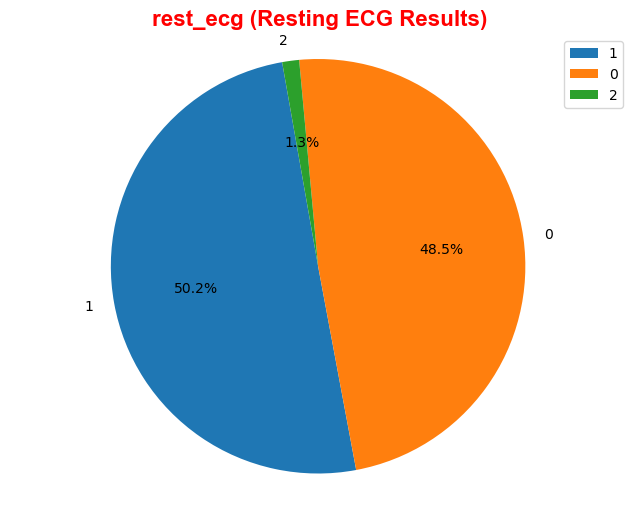

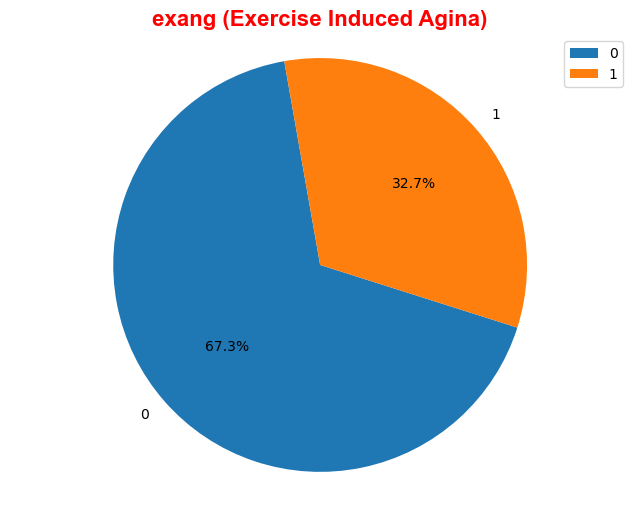

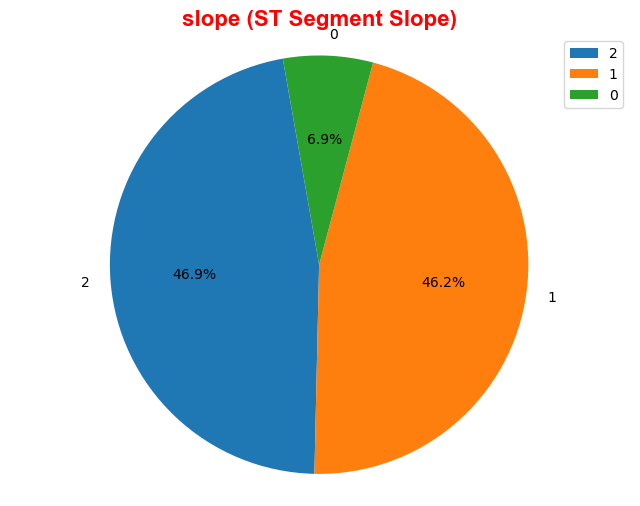

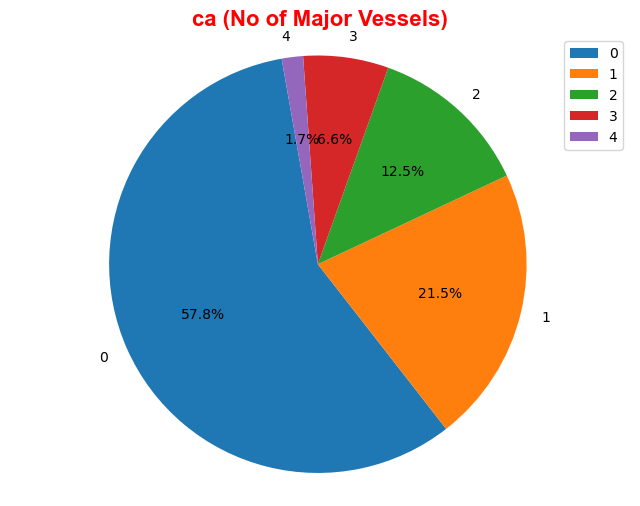

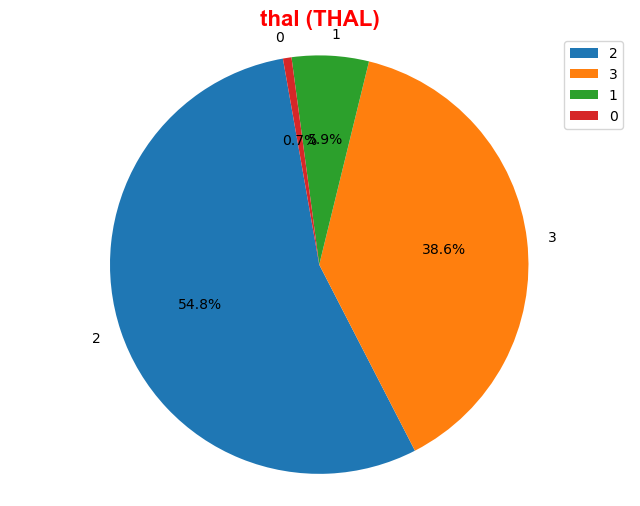

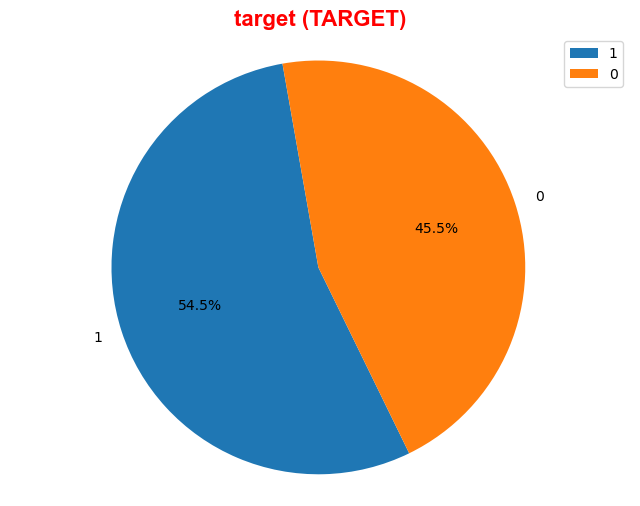

In [34]:
font_title={'family':'arial','color':'red','weight':'bold','size':16}
font_axis={'family':'arial','color':'red','weight':'bold','size':16}
for i,j in b:
    fig,ax=plt.subplots(figsize=(8,6))
    indexes=list(data[i].value_counts().index)
    values=list(data[i].value_counts())
    plt.pie(values,labels=indexes,autopct='%1.1f%%',startangle=100,labeldistance=1.1)
    ax.axis("equal")
    plt.title(i+" (" +j+ ")",fontdict=font_title)
    plt.legend()
    plt.show()

In [35]:
# From the piechart of thal, the 0s are not 0s rather they are the missing values, so first fill up by nan, then by mode, 
# since its a categorical variable.
data['thal'].value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

In [36]:
data[data.thal==0]

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0


In [37]:
a=data['thal'].mode()[0]
a
# Mode is 2 in thal

2

In [38]:
data['thal']=data['thal'].replace(0,a) 

In [39]:
data.loc[[48,281],:]

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,2,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,2,0


In [40]:
data['thal'].dtypes

dtype('int64')

In [41]:
data['thal'].value_counts()

2    168
3    117
1     18
Name: thal, dtype: int64

In [42]:
# So far we have done univariate analysis, now let us focus on bi-variate analysis.
# Bivariate analysis of numeric variables using FacetGrid.

In [43]:
num_variables.append('target')

In [44]:
num_variables

['age', 'trtbps', 'chol', 'thalach', 'oldpeak', 'target']

In [45]:
axis_names=['Patient Age','Resting bp','Cholestrol','Highest Heart Rate','ST Depression']
b=list(zip(num_variables,axis_names))
b

[('age', 'Patient Age'),
 ('trtbps', 'Resting bp'),
 ('chol', 'Cholestrol'),
 ('thalach', 'Highest Heart Rate'),
 ('oldpeak', 'ST Depression')]

<Figure size 1000x600 with 0 Axes>

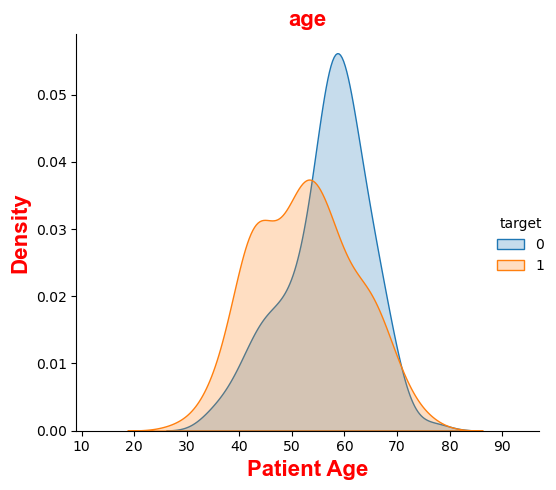

<Figure size 1000x600 with 0 Axes>

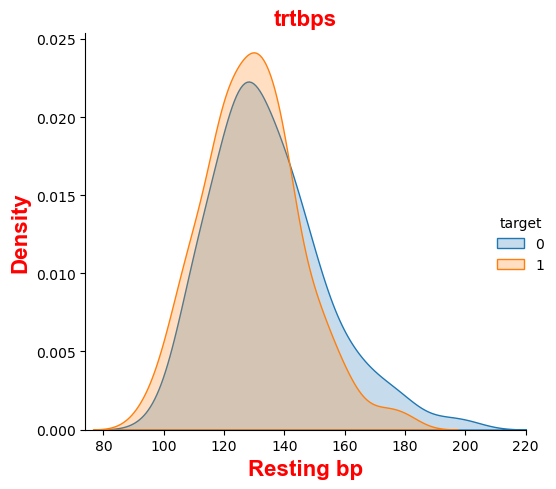

<Figure size 1000x600 with 0 Axes>

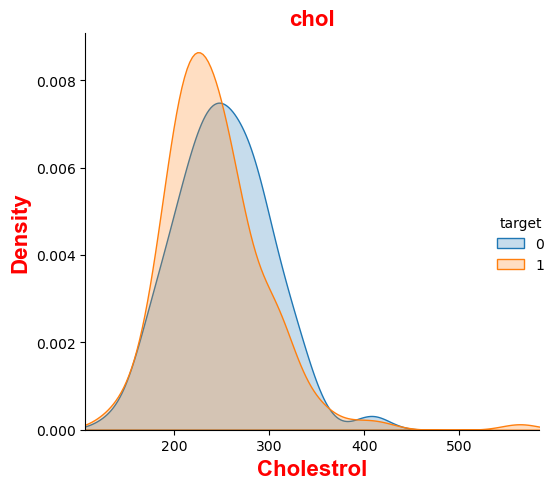

<Figure size 1000x600 with 0 Axes>

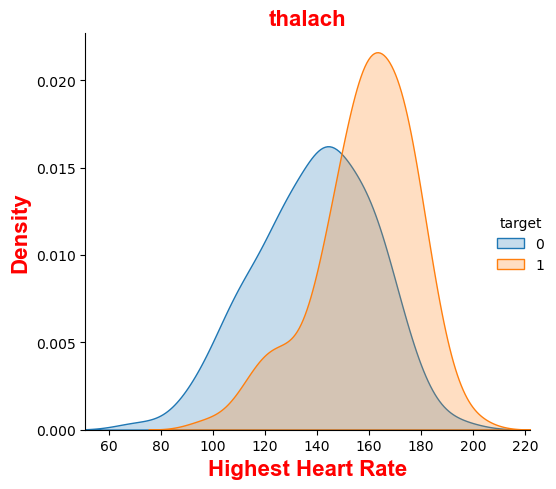

<Figure size 1000x600 with 0 Axes>

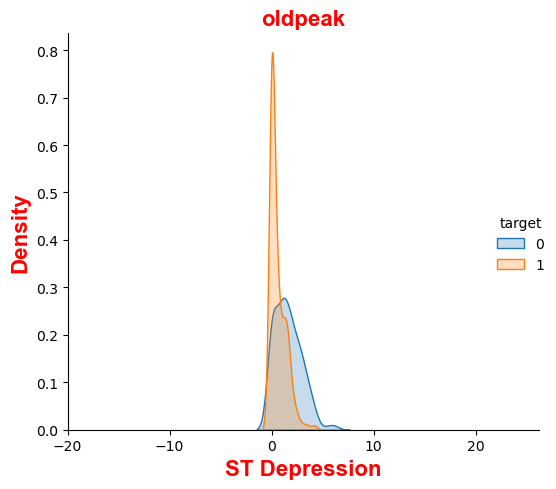

In [46]:
font_title={'family':'arial','color':'red','weight':'bold','size':16}
font_axes={'family':'arial','color':'red','weight':'bold','size':16}
for i,j in b:
    plt.figure(figsize=(10,6))
    graph=sns.FacetGrid(data[num_variables],hue='target',height=5,xlim=((data[i].min()-20),(data[i].max()+20)))
    graph.map(sns.kdeplot,i,shade=True)
    graph.add_legend()
    plt.title(i,fontdict=font_title)
    plt.xlabel(j,fontdict=font_axes)
    plt.ylabel("Density",fontdict=font_axes)
    plt.tight_layout()
    plt.show()

In [47]:
data[num_variables].corr()

,age,trtbps,chol,thalach,oldpeak,target
age,1.000000,0.279351,0.213678,-0.398522,0.210013,-0.225439
trtbps,0.279351,1.000000,0.123174,-0.046698,0.193216,-0.144931
chol,0.213678,0.123174,1.000000,-0.009940,0.053952,-0.085239
thalach,-0.398522,-0.046698,-0.009940,1.000000,-0.344187,0.421741
oldpeak,0.210013,0.193216,0.053952,-0.344187,1.000000,-0.430696
target,-0.225439,-0.144931,-0.085239,0.421741,-0.430696,1.000000


In [48]:
# Low to moderate correlations

In [49]:
# Bivariate analysis of categorical variables with Countplot.

In [50]:
categorical_variables

['sex', 'cp', 'fbs', 'rest_ecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [51]:
categorical_axis_names

['Gender',
 'Type of Chest Pain',
 'Fasting BS',
 'Resting ECG Results',
 'Exercise Induced Agina',
 'ST Segment Slope',
 'No of Major Vessels',
 'THAL',
 'TARGET']

In [52]:
b=list(zip(categorical_variables,categorical_axis_names))
b

[('sex', 'Gender'),
 ('cp', 'Type of Chest Pain'),
 ('fbs', 'Fasting BS'),
 ('rest_ecg', 'Resting ECG Results'),
 ('exang', 'Exercise Induced Agina'),
 ('slope', 'ST Segment Slope'),
 ('ca', 'No of Major Vessels'),
 ('thal', 'THAL'),
 ('target', 'TARGET')]

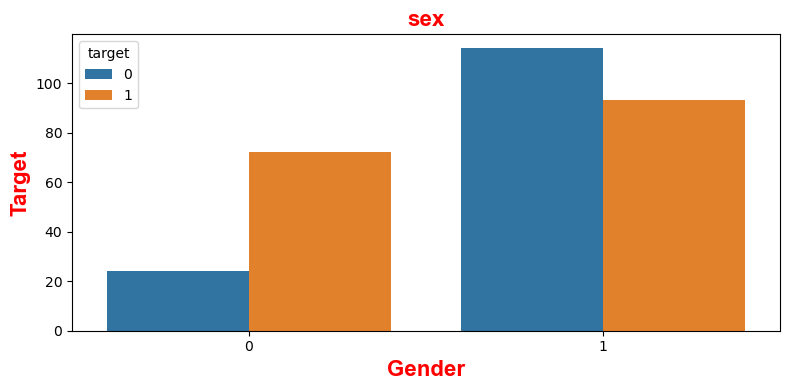

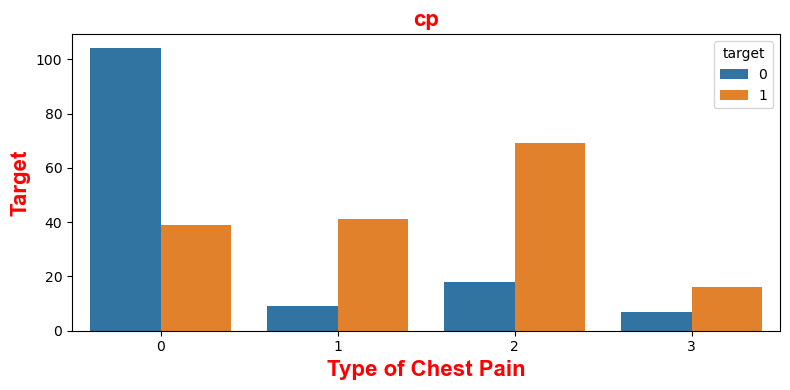

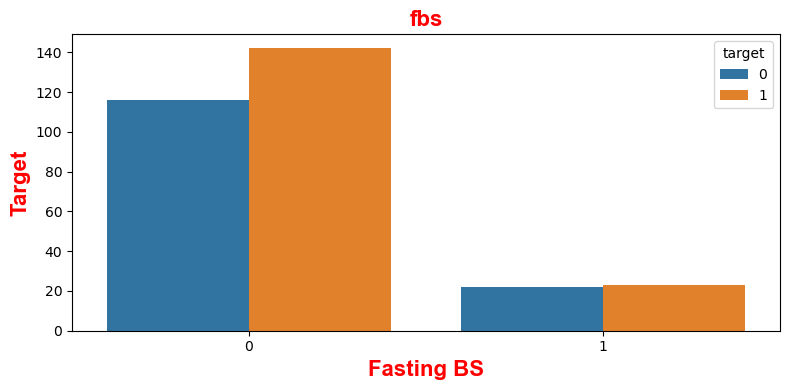

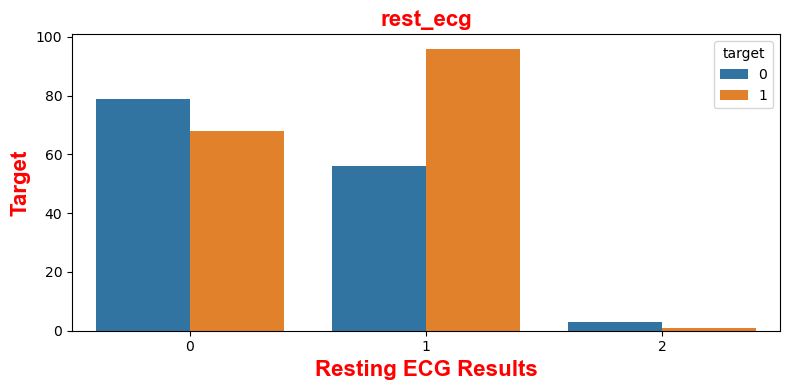

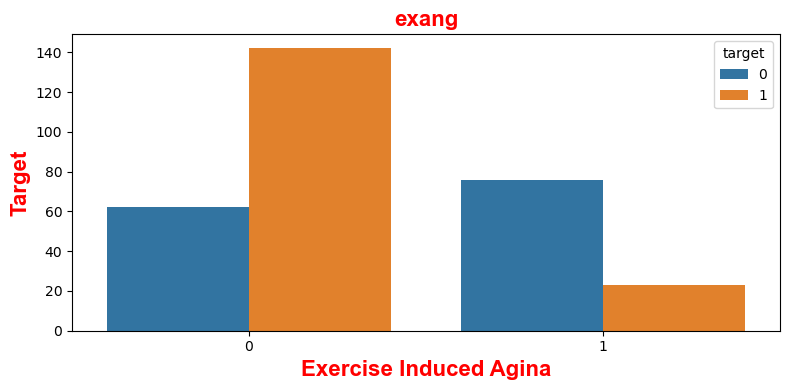

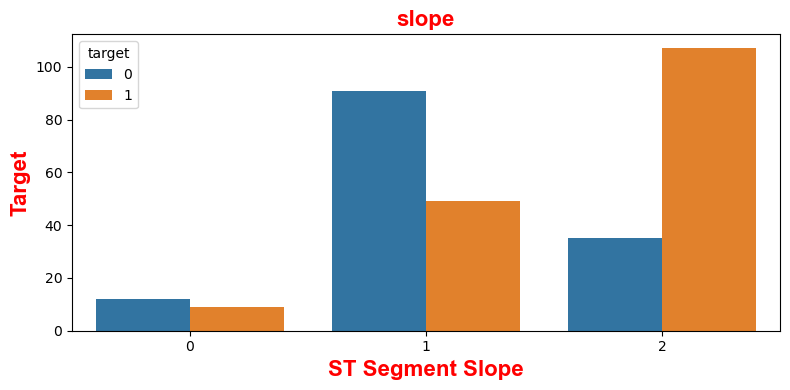

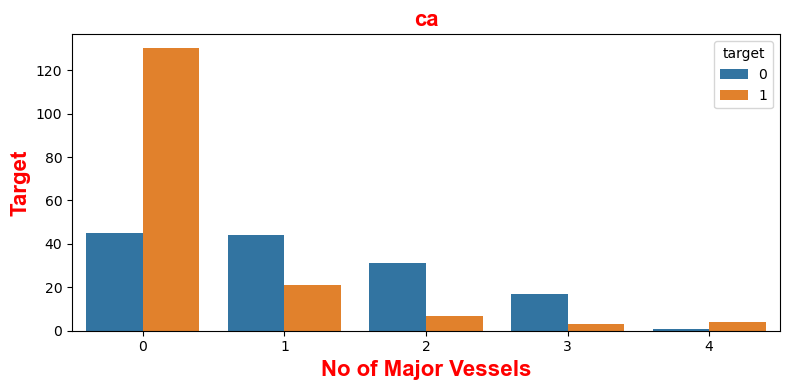

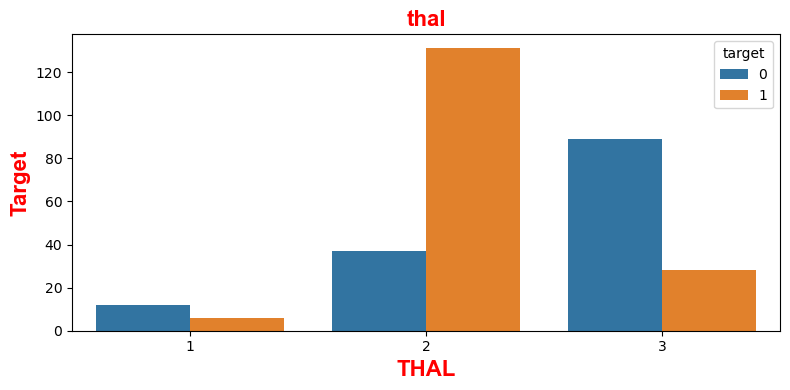

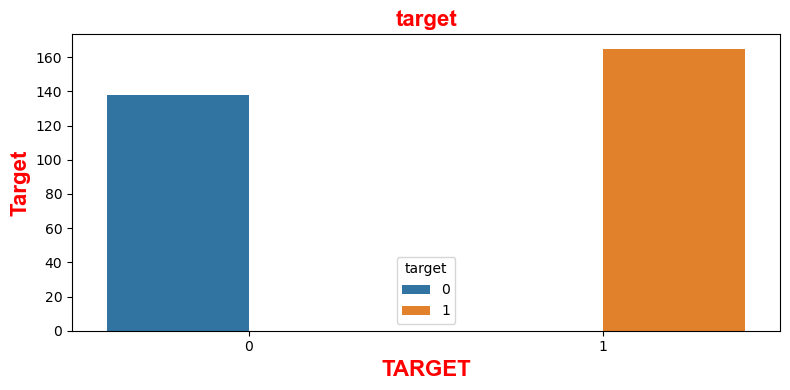

In [53]:
font_title={'family':'arial','color':'red','weight':'bold','size':16}
font_axes={'family':'arial','color':'red','weight':'bold','size':16}
for i,j in b:
    plt.figure(figsize=(8,4))
    sns.countplot(i,data=data[categorical_variables],hue='target')
    plt.title(i,fontdict=font_title)
    plt.xlabel(j,fontdict=font_axes)
    plt.ylabel("Target",fontdict=font_axes)
    plt.tight_layout()
    plt.show()

In [54]:
data[categorical_variables].corr()

,sex,cp,fbs,rest_ecg,exang,slope,ca,thal,target
sex,1.000000,-0.049353,0.045032,-0.058196,0.141664,-0.030711,0.118261,0.211652,-0.280937
cp,-0.049353,1.000000,0.094444,0.044421,-0.394280,0.119717,-0.181053,-0.169125,0.433798
fbs,0.045032,0.094444,1.000000,-0.084189,0.025665,-0.059894,0.137979,-0.011209,-0.028046
rest_ecg,-0.058196,0.044421,-0.084189,1.000000,-0.070733,0.093045,-0.072042,-0.013795,0.137230
exang,0.141664,-0.394280,0.025665,-0.070733,1.000000,-0.257748,0.115739,0.225508,-0.436757
slope,-0.030711,0.119717,-0.059894,0.093045,-0.257748,1.000000,-0.080155,-0.106310,0.345877
ca,0.118261,-0.181053,0.137979,-0.072042,0.115739,-0.080155,1.000000,0.143248,-0.391724
thal,0.211652,-0.169125,-0.011209,-0.013795,0.225508,-0.106310,0.143248,1.000000,-0.363322
target,-0.280937,0.433798,-0.028046,0.137230,-0.436757,0.345877,-0.391724,-0.363322,1.000000


In [55]:
data[categorical_variables].corr().iloc[:,[-1]]

,target
sex,-0.280937
cp,0.433798
fbs,-0.028046
rest_ecg,0.137230
exang,-0.436757
slope,0.345877
ca,-0.391724
thal,-0.363322
target,1.000000


In [56]:
# Here, also low to moderate correlations

In [57]:
num_variables

['age', 'trtbps', 'chol', 'thalach', 'oldpeak', 'target']

In [58]:
num_variables.remove('target')

In [59]:
data[num_variables].head()

,age,trtbps,chol,thalach,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6


In [60]:
# Robust Scaler is not sensitive to outliers and is robust to outliers, since for scaling it uses Median and IQR which are 
# not affected by outliers, whereas mean and standard deviation are affected by outliers. So with Robust Scaler, it will 
# prevent the scaling from getting skewed and the data points will be centered around 0 and the scaling range will be robust
# to outliers.
# Xscaled_feature = (X-Median of the corresponding feature)/IQR of the corresponding feature, X being a data point; IQR=Q3-Q1.
# After scaling the median of each feature will  become 0

In [61]:
data_new=pd.concat((data[num_variables],data.loc[:,"target"]),axis=1)
data_new.head()

,age,trtbps,chol,thalach,oldpeak,target
0,63,145,233,150,2.3,1
1,37,130,250,187,3.5,1
2,41,130,204,172,1.4,1
3,56,120,236,178,0.8,1
4,57,120,354,163,0.6,1


In [62]:
data_melt=pd.melt(data_new,id_vars="target",var_name="variables",value_name="values")
data_melt

,target,variables,values
0,1,age,63.0
1,1,age,37.0
2,1,age,41.0
3,1,age,56.0
4,1,age,57.0
...,...,...,...
1510,0,oldpeak,0.2
1511,0,oldpeak,1.2
1512,0,oldpeak,3.4
1513,0,oldpeak,1.2


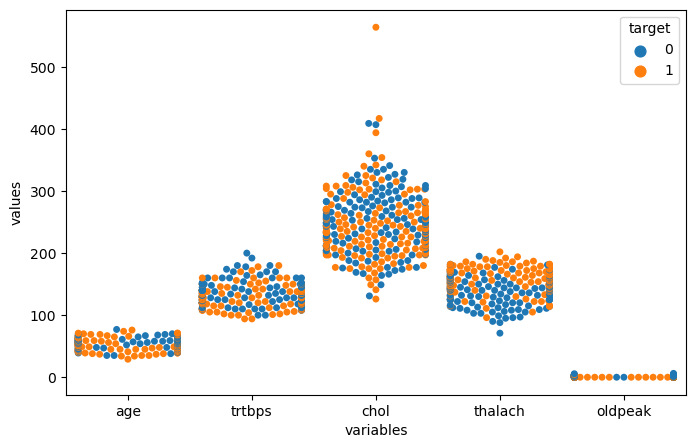

In [63]:
plt.figure(figsize=(8,5))
sns.swarmplot(x="variables",y="values",hue="target",data=data_melt)
plt.show()
#plt.figure(figsize=(8,5))
#sns.swarmplot(x="variables",y="values",hue="target",data=data_melt)
#plt.show()

The variables don't seem to provide a clear visual separation between the two target categories.
Most variables have overlapping distributions for both categories.
The correlation between age and target seems to be low to moderate as the blue and orange dots are not that well seperated.
The correlation between trtbps and target also seems to be low to moderate since the blue and orange dots are not that well seperated.
same can be said for the other two numeric variables.

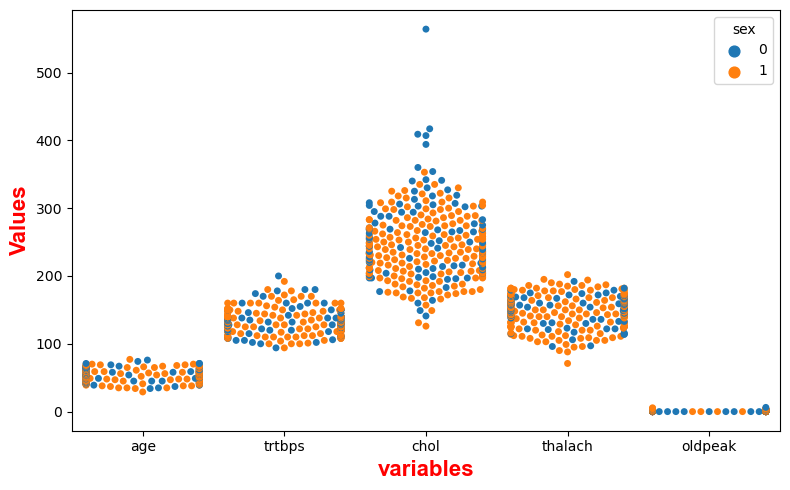

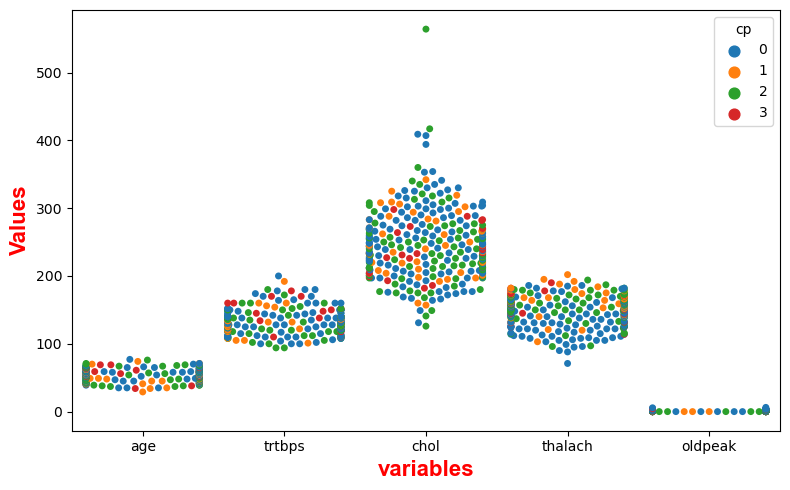

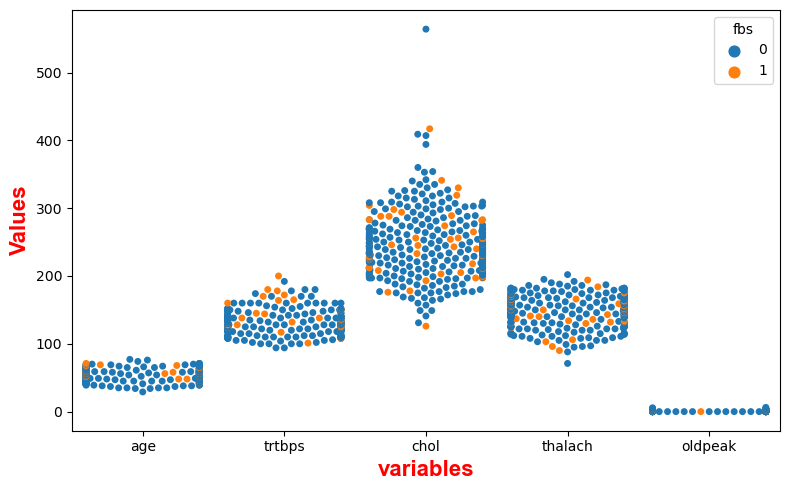

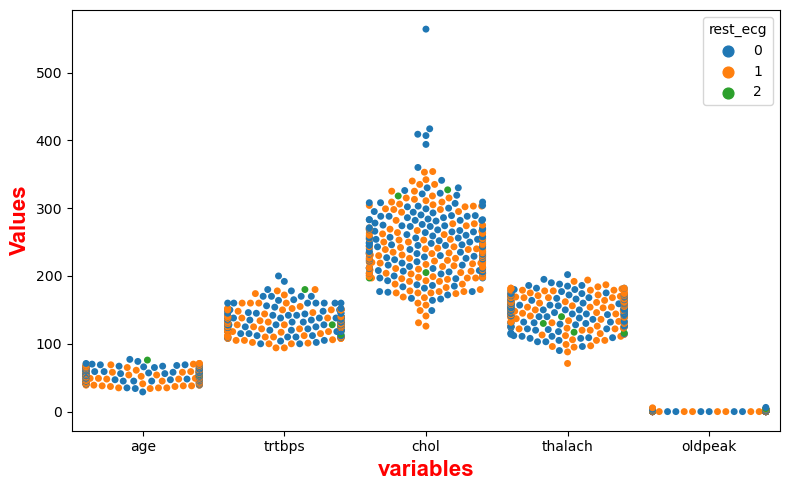

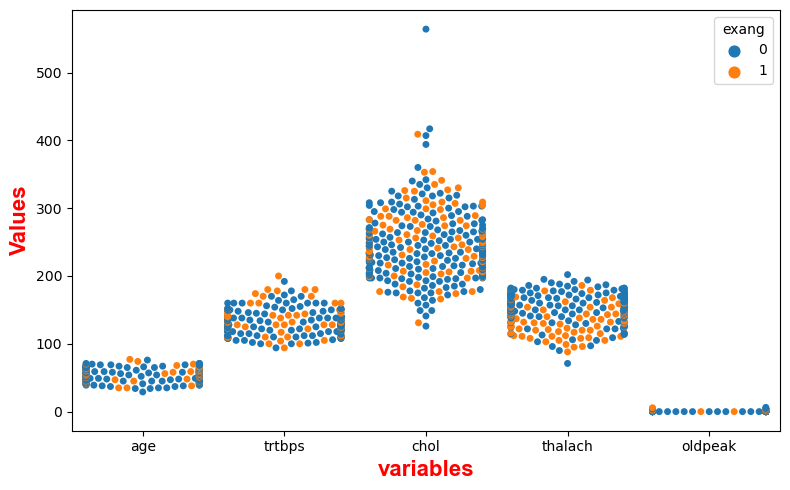

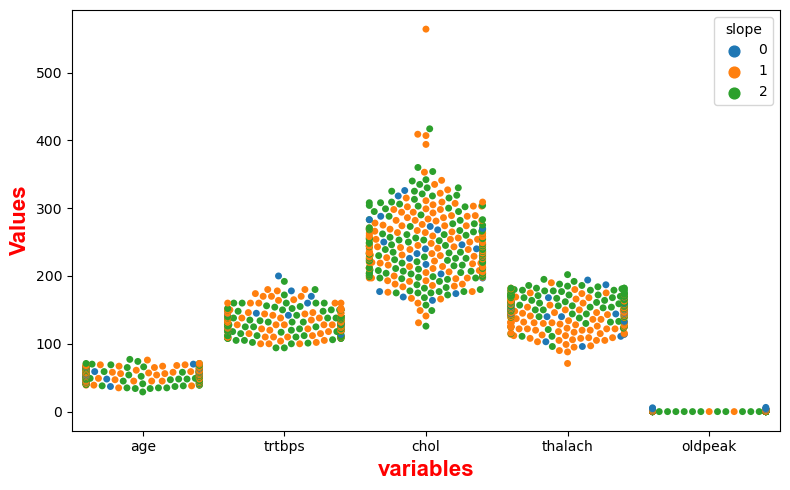

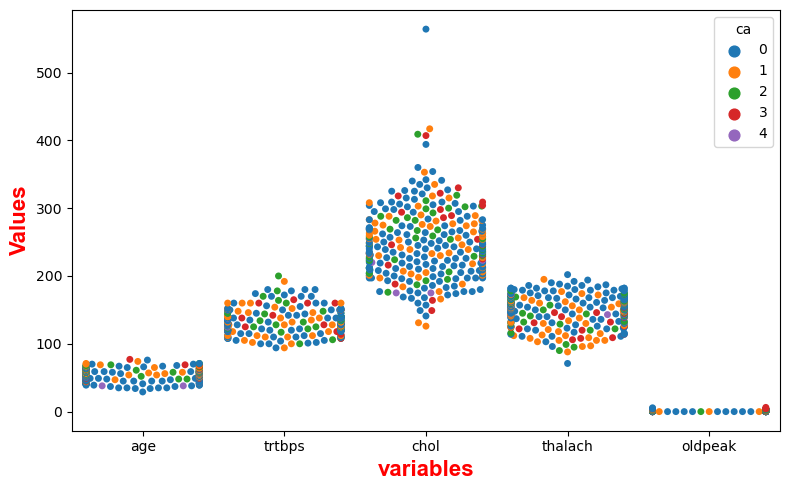

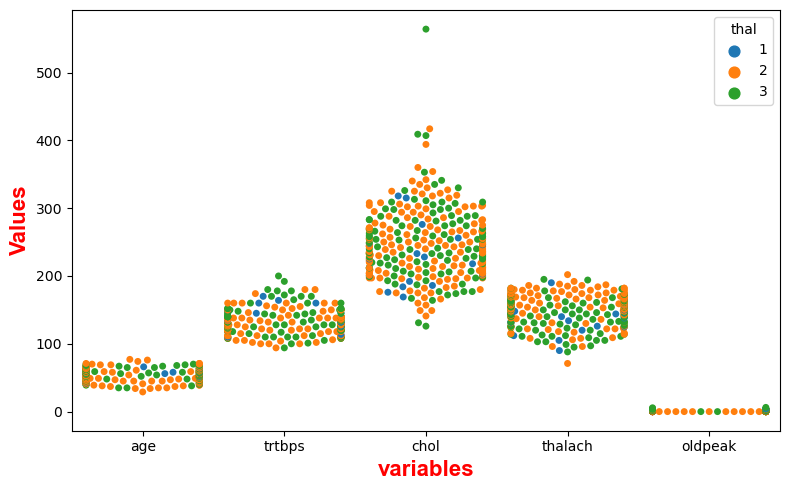

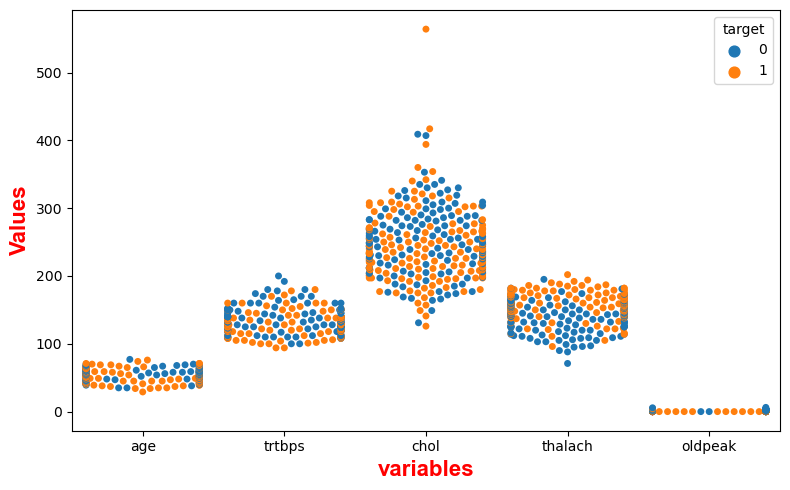

In [64]:
font_axes={'family':'arial','color':'red','weight':'bold','size':16}
for i in data[categorical_variables]:
    data_new1=pd.concat((data[num_variables],data.loc[:,i]),axis=1)
    data_melt1=pd.melt(data_new1,id_vars=i,var_name="variables",value_name="values")
    plt.figure(figsize=(8,5))
    sns.swarmplot(x="variables",y="values",hue=i,data=data_melt1)
    plt.xlabel("variables",fontdict=font_axes)
    plt.ylabel("Values",fontdict=font_axes)
    plt.tight_layout()
    plt.show()

In [65]:
# Overall can say that not very strong correlation between the numerical variables and each categorical variable, since dots
# are not that well distinctive or seperated.

In [66]:
data.head()

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [67]:
corr_matrix=data.corr()

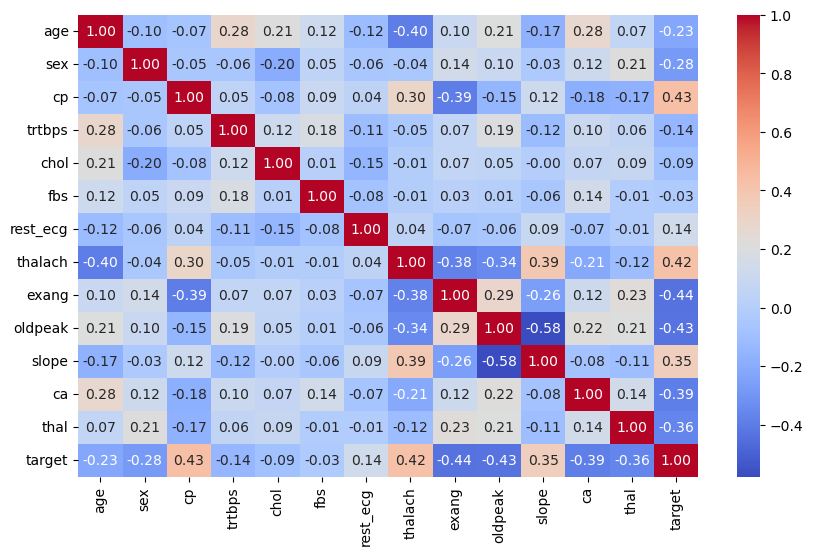

In [68]:
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.show()

In [69]:
corr_matrix

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.066745,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.211652,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.169125,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.060638,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.087866,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.011209,-0.028046
rest_ecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.013795,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.115310,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.225508,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210236,-0.430696


In [70]:
data=data.drop(['chol','fbs','rest_ecg'],axis=1)
# 'age','trtbps','chol','thalach','oldpeak'

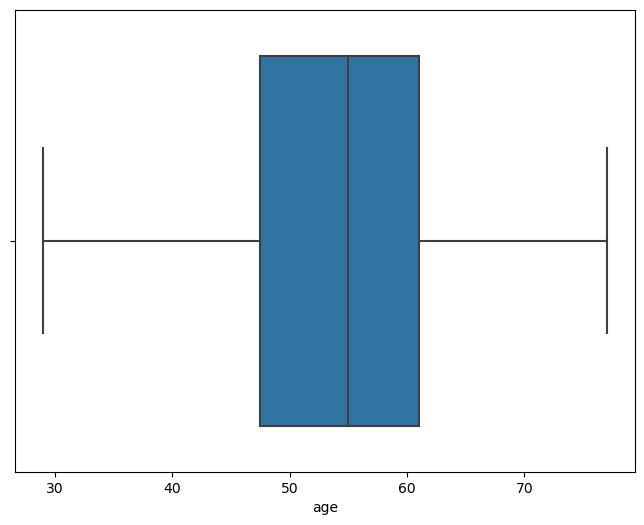

In [71]:
plt.figure(figsize=(8,6))
sns.boxplot(data['age'])
plt.show()

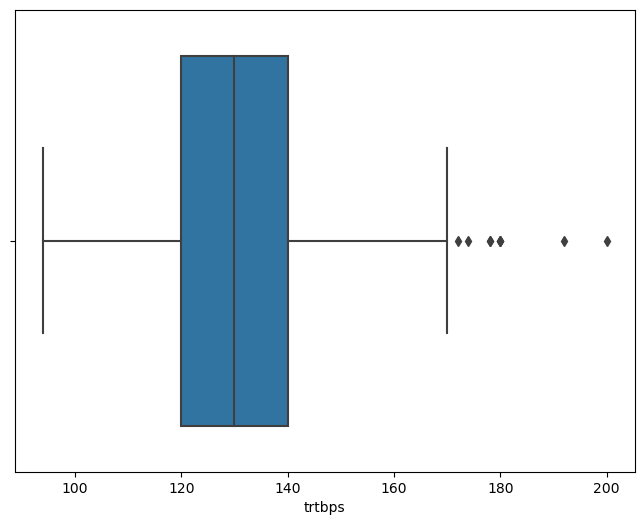

In [72]:
plt.figure(figsize=(8,6))
sns.boxplot(data['trtbps'])
plt.show()

In [73]:
# 'thalach','oldpeak'

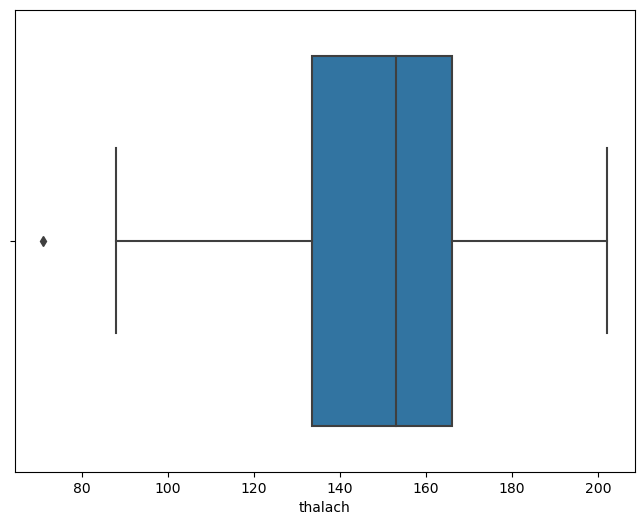

In [74]:
plt.figure(figsize=(8,6))
sns.boxplot(data['thalach'])
plt.show()

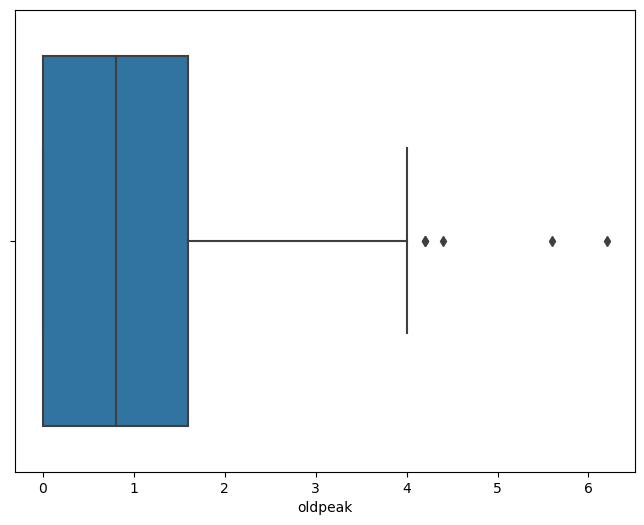

In [75]:
plt.figure(figsize=(8,6))
sns.boxplot(data['oldpeak'])
plt.show()

In [76]:
# Outliers

In [77]:
from scipy.stats import zscore

In [78]:
zscore_trtbps=zscore(data['trtbps'])
for thresh in range(1,4):
    print("The threshold value is: ",thresh)
    print("The number of outliers are:{}".format(len(np.where(zscore_trtbps>thresh)[0])))
    print()

The threshold value is:  1
The number of outliers are:51

The threshold value is:  2
The number of outliers are:13

The threshold value is:  3
The number of outliers are:2



when thresh is first 1, wherever the zscore is greater than 1 those will be considered as outliers, then using the len function we can get the total number of outliers lying outside of 1. Then when thresh is 2, wherever the zscore is greater than 2, those will be considered as outliers, and using the len function i can get the the number of outliers lying outside 2. Then when the thresh is 3, wherever the zscore is greater than 3, those will be considered as outliers, and using the len function we can get the number of outliers lying outside 3.

In [79]:
# np.where(zscore_trtbps>thresh)[0] will give me the indices and len will give the number of such data points or outliers 
# that exist.

In [80]:
thresh=1
a=np.where(zscore_trtbps>thresh)
print(a,type(a))

(array([  8,   9,  14,  17,  18,  23,  25,  26,  37,  38,  39,  83, 101,
       106, 110, 111, 127, 130, 145, 147, 150, 152, 165, 179, 181, 184,
       195, 196, 202, 203, 204, 207, 220, 223, 228, 231, 232, 240, 241,
       243, 247, 248, 254, 258, 260, 266, 283, 287, 292, 293, 297],
      dtype=int64),) <class 'tuple'>


In [81]:
a=np.where(zscore_trtbps>thresh)[0]
print(a,type(a))

[  8   9  14  17  18  23  25  26  37  38  39  83 101 106 110 111 127 130
 145 147 150 152 165 179 181 184 195 196 202 203 204 207 220 223 228 231
 232 240 241 243 247 248 254 258 260 266 283 287 292 293 297] <class 'numpy.ndarray'>


In [82]:
a=len(np.where(zscore_trtbps>thresh)[0])
print(a,type(a))

51 <class 'int'>


In [83]:
zscore_trtbps

0      0.763956
1     -0.092738
2     -0.092738
3     -0.663867
4     -0.663867
         ...   
298    0.478391
299   -1.234996
300    0.706843
301   -0.092738
302   -0.092738
Name: trtbps, Length: 303, dtype: float64

In [84]:
# Since its a small datasize hence will take thresh as 2 and not as 3, for considering outliers. That is 2 standard deviations.

In [85]:
data[zscore_trtbps>2][['trtbps']]
# These are the outliers for this column

,trtbps
8,172
101,178
110,180
152,170
195,170
203,180
223,200
228,170
241,174
248,192


In [86]:
# Let us treat the outliers, not delete otherwise may lose the volatility of the data.

In [87]:
from scipy import stats
from scipy.stats.mstats import winsorize

In [88]:
# Find the min value of outliers
data[zscore_trtbps>2].trtbps.min()
# It is 170

170

In [89]:
# The largest value below 170
data[data['trtbps']<170].trtbps.max()

165

In [90]:
win_trtbps_percentile=stats.percentileofscore(data['trtbps'],165)/100
win_trtbps_percentile
# 95.7095709570957% of data points are less than or equal to 165.

0.957095709570957

In [91]:
1-win_trtbps_percentile

0.04290429042904298

In [92]:
win_trtbps=winsorize(data['trtbps'],limits=(0,1-win_trtbps_percentile))
# Values above 165 that is 4.29% of data points will be capped to 165.
# 0 is for the lower limit means no capping on the lower end.
# 1-win_trtbps_percentile means proportion of data to cap to the upper end which is 165.

In [93]:
data['trtbps'].min()

94

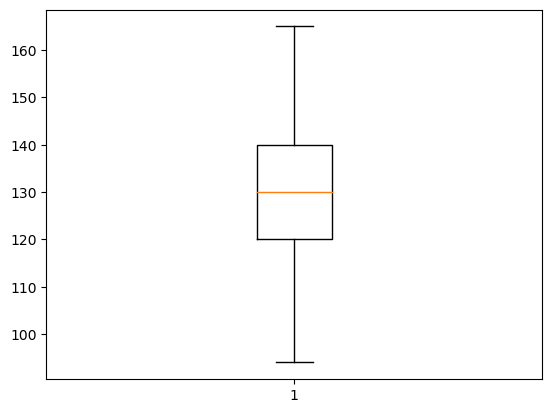

In [94]:
plt.boxplot(win_trtbps)
plt.show()

In [95]:
# No outliers

In [96]:
data['win_trtbps']=win_trtbps

In [97]:
data.head()

,age,sex,cp,trtbps,thalach,exang,oldpeak,slope,ca,thal,target,win_trtbps
0,63,1,3,145,150,0,2.3,0,0,1,1,145
1,37,1,2,130,187,0,3.5,0,0,2,1,130
2,41,0,1,130,172,0,1.4,2,0,2,1,130
3,56,1,1,120,178,0,0.8,2,0,2,1,120
4,57,0,0,120,163,1,0.6,2,0,2,1,120


In [98]:
data['win_trtbps'].max()

165

In [99]:
# Since, thalach variable is left skewed so not 100% Normal Distribution, hence zscore method may not be the best method for outlier treatment, instead better
# to use IQR. 

In [100]:
Q1=data['thalach'].quantile(0.25)
Q3=data['thalach'].quantile(0.75)
IQR=Q3-Q1
LL=Q1-1.5*IQR
UL=Q3+1.5*IQR
Outliers=data[(data['thalach']<LL)|(data['thalach']>UL)]
(Outliers)
# There is only one outlier for this. Can delete this

,age,sex,cp,trtbps,thalach,exang,oldpeak,slope,ca,thal,target,win_trtbps
272,67,1,0,120,71,0,1.0,1,0,2,0,120


In [101]:
data=data.drop([272],axis=0)

In [102]:
data[270:275]
# 272 is gone

,age,sex,cp,trtbps,thalach,exang,oldpeak,slope,ca,thal,target,win_trtbps
270,46,1,0,120,144,0,0.8,2,0,3,0,120
271,61,1,3,134,145,0,2.6,1,2,2,0,134
273,58,1,0,100,156,0,0.1,2,1,3,0,100
274,47,1,0,110,118,1,1.0,1,1,2,0,110
275,52,1,0,125,168,0,1.0,2,2,3,0,125


In [103]:
# oldpeak variable is left

In [104]:
def my_iqr(data,col):
    Q1=data[col].quantile(0.25)
    Q3=data[col].quantile(0.75)
    IQR=Q3-Q1
    LL=Q1-1.5*IQR
    UL=Q3+1.5*IQR
    Outliers=data[(data[col]<LL)|(data[col]>UL)]
    return Outliers

In [105]:
oldpeak_out=my_iqr(data,'oldpeak')

In [106]:
oldpeak_out
# There are 5 outliers, so ain't a good idea to delete them.

,age,sex,cp,trtbps,thalach,exang,oldpeak,slope,ca,thal,target,win_trtbps
101,59,1,3,178,145,0,4.2,0,0,3,1,165
204,62,0,0,160,145,0,6.2,0,3,3,0,160
221,55,1,0,140,111,1,5.6,0,0,3,0,140
250,51,1,0,140,122,1,4.2,1,3,3,0,140
291,58,1,0,114,140,0,4.4,0,3,1,0,114


In [107]:
# So, apply transformation through winsorize

In [108]:
oldpeak_out['oldpeak'].min()
# This is the minimum value of Outlier present.
# So let us find out the maximum value below 4.2 which will be my upper end

4.2

In [109]:
data[data['oldpeak']<4.2].oldpeak.max()
# Its 4

4.0

In [110]:
# Let us find its percentile rank
win_oldpeak_percentile=(stats.percentileofscore(data['oldpeak'],4.0))/100
win_oldpeak_percentile
# So 98% of values are less than or equal to 4.0

0.980132450331126

In [111]:
1-win_oldpeak_percentile
# Approx 2% of the data points are above 4.0

0.01986754966887405

In [112]:
win_oldpeak=winsorize(data['oldpeak'],limits=(0,1-win_oldpeak_percentile))

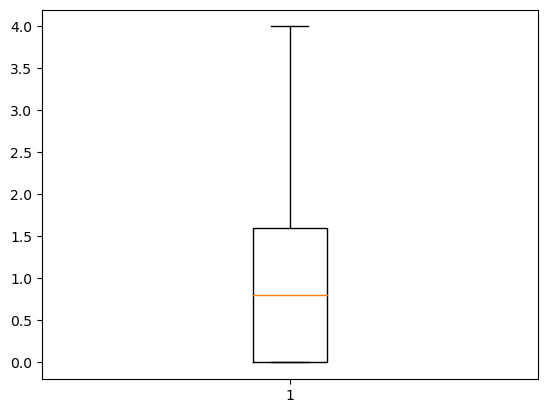

In [113]:
plt.boxplot(win_oldpeak)
plt.show()
# No outliers here

In [114]:
data['win_oldpeak']=win_oldpeak

In [115]:
data.head()

,age,sex,cp,trtbps,thalach,exang,oldpeak,slope,ca,thal,target,win_trtbps,win_oldpeak
0,63,1,3,145,150,0,2.3,0,0,1,1,145,2.3
1,37,1,2,130,187,0,3.5,0,0,2,1,130,3.5
2,41,0,1,130,172,0,1.4,2,0,2,1,130,1.4
3,56,1,1,120,178,0,0.8,2,0,2,1,120,0.8
4,57,0,0,120,163,1,0.6,2,0,2,1,120,0.6


In [116]:
data['win_oldpeak'].max()

4.0

In [117]:
data=data.drop(['trtbps','oldpeak'],axis=1)

In [118]:
data.head()

,age,sex,cp,thalach,exang,slope,ca,thal,target,win_trtbps,win_oldpeak
0,63,1,3,150,0,0,0,1,1,145,2.3
1,37,1,2,187,0,0,0,2,1,130,3.5
2,41,0,1,172,0,2,0,2,1,130,1.4
3,56,1,1,178,0,2,0,2,1,120,0.8
4,57,0,0,163,1,2,0,2,1,120,0.6


In [119]:
# Now let us check for skewness of the numeric variables.

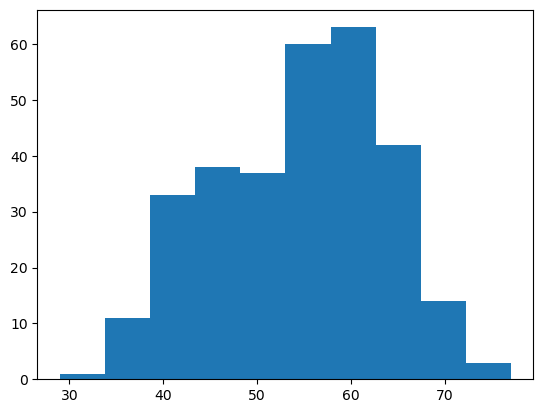

In [120]:
plt.hist(data['age'])
plt.show()

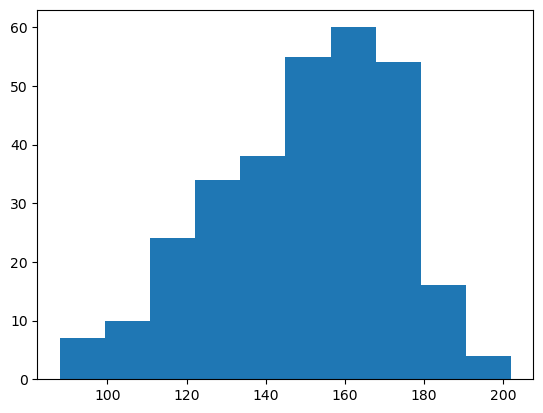

In [121]:
plt.hist(data['thalach'])
plt.show()

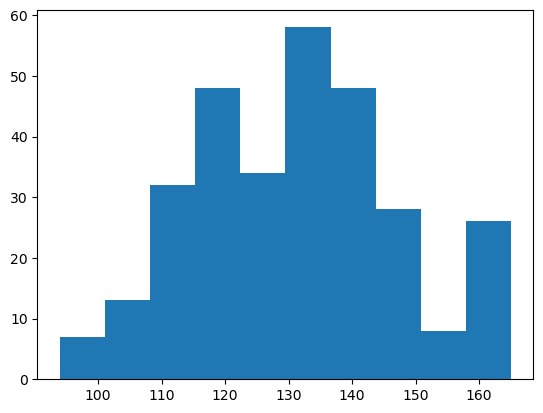

In [122]:
plt.hist(data['win_trtbps'])
plt.show()

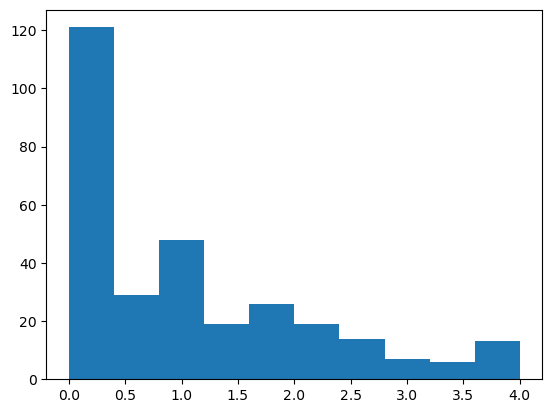

In [123]:
plt.hist(data['win_oldpeak'])
plt.show()

In [124]:
data[['age','thalach','win_trtbps','win_oldpeak']].agg(['skew']).transpose()

,skew
age,-0.199209
thalach,-0.461611
win_trtbps,0.251969
win_oldpeak,0.996036


In [125]:
# Now, win_oldpeak has right skewness, so like a moderate unsymmetrical distribution.
# If skewness value is between -0.5 and 0.5 it is a fair symmetrical distribution, with no skewness.
# If skewness value is between -1.0 and -0.5 it is moderately negative skewed distribution. 
# If skewness between 0.5 and 1.0 there is moderately positive skewed distribution.
# If skewness value is lesser than -1.0 or greater than 1.0, then that variable would have a very highly skewed distribution.
# win_oldpeak--> 0.996036, means moderate positively skewed distribution

In [126]:
# To handle skewness we can apply sqrt or log transformation on the win_oldpeak vriable, to make it a normally distributed 
# variable.

In [127]:
data['win_oldpeak_log']=np.log(data['win_oldpeak'])
data['win_oldpeak_sqrt']=np.sqrt(data['win_oldpeak'])

In [128]:
data.head()

,age,sex,cp,thalach,exang,slope,ca,thal,target,win_trtbps,win_oldpeak,win_oldpeak_log,win_oldpeak_sqrt
0,63,1,3,150,0,0,0,1,1,145,2.3,0.832909,1.516575
1,37,1,2,187,0,0,0,2,1,130,3.5,1.252763,1.870829
2,41,0,1,172,0,2,0,2,1,130,1.4,0.336472,1.183216
3,56,1,1,178,0,2,0,2,1,120,0.8,-0.223144,0.894427
4,57,0,0,163,1,2,0,2,1,120,0.6,-0.510826,0.774597


In [129]:
data[['win_oldpeak','win_oldpeak_log','win_oldpeak_sqrt']].agg(['skew']).transpose()

,skew
win_oldpeak,0.996036
win_oldpeak_log,NaN
win_oldpeak_sqrt,0.108926


In [130]:
# since win_oldpeak_log yields Nan and win_oldpeak_sqrt has 0.108926, then it has reduced, that is skewness has reduced from
# 0.996036 to 0.108926. So keep win_oldpeak_sqrt and drop win_oldpeak, win_oldpeak_log columns

In [131]:
data=data.drop(['win_oldpeak','win_oldpeak_log'],axis=1)

In [132]:
data.head()

,age,sex,cp,thalach,exang,slope,ca,thal,target,win_trtbps,win_oldpeak_sqrt
0,63,1,3,150,0,0,0,1,1,145,1.516575
1,37,1,2,187,0,0,0,2,1,130,1.870829
2,41,0,1,172,0,2,0,2,1,130,1.183216
3,56,1,1,178,0,2,0,2,1,120,0.894427
4,57,0,0,163,1,2,0,2,1,120,0.774597


In [133]:
categorical_variables

['sex', 'cp', 'fbs', 'rest_ecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [134]:
categorical_variables.remove("fbs")

In [135]:
categorical_variables.remove("rest_ecg")

In [136]:
print(data['sex'].unique())

[1 0]


In [137]:
print(data['cp'].unique())

[3 2 1 0]


In [138]:
print(data['exang'].unique())

[0 1]


In [139]:
print(data['slope'].unique())

[0 2 1]


In [140]:
print(data['ca'].unique())

[0 2 1 3 4]


In [141]:
print(data['thal'].unique())

[1 2 3]


In [142]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Since, outliers were treated and the skewness was corrected to ensure that the numeric features are normally distributed
# hence using StandardScaler instead of using RobustScaler.
# StandardScaler will standardize the features where mean = 0 and std = 1, will preserve the original distribution.
# MinMaxScaler will will bring all the same scale between 0 to 1, but i want to preserve original distribution hence using
# StandardScaler.

In [143]:
X=data.drop('target',axis=1)
Y=data['target']

In [144]:
Y.value_counts()
# Slightly imbalanced data.

1    165
0    137
Name: target, dtype: int64

In [145]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [146]:
sc=StandardScaler()

In [147]:
continous_features=['age','thalach','win_trtbps','win_oldpeak_sqrt']

In [148]:
X_train[continous_features]=sc.fit_transform(X_train[continous_features])

In [149]:
X_test[continous_features]=sc.transform(X_test[continous_features])

In [150]:
from sklearn.linear_model import LogisticRegression

In [151]:
from sklearn.metrics import classification_report,accuracy_score,roc_curve,roc_auc_score

In [152]:
log_reg=LogisticRegression(random_state=42)

In [153]:
log_reg.fit(X_train,Y_train)

LogisticRegression(random_state=42)

In [154]:
Y_pred=log_reg.predict(X_test)

In [155]:
Y_pred_proba=log_reg.predict_proba(X_test)[:,1]

In [156]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88        29
           1       0.90      0.88      0.89        32

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



In [157]:
accuracy=accuracy_score(Y_test,Y_pred)
print(accuracy)

0.8852459016393442


In [158]:
roc_auc=roc_auc_score(Y_test,Y_pred_proba)
print(roc_auc)

0.9310344827586207


In [159]:
from sklearn.model_selection import GridSearchCV,StratifiedKFold

In [160]:
model_log_reg=LogisticRegression(random_state=42)

In [161]:
cv=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

In [162]:
param_grid={
    'C':[0.001,0.01,0.1,1,10,100], # Regularization strenght: If too low-->strong regularization, less likely to overfit, but more likely to underfit. If too high more likely to overfit.
    'penalty':['l1','l2'],   # Regularization type                                
    'solver':['liblinear','newton-cg','lbfgs','saga']  # Optimization ALgorithm.
}

In [163]:
grid_search=GridSearchCV(estimator=model_log_reg,param_grid=param_grid,cv=cv,n_jobs=-1,scoring='roc_auc')

In [164]:
grid_search.fit(X_train,Y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'newton-cg', 'lbfgs', 'saga']},
             scoring='roc_auc')

In [165]:
best_model_log=grid_search.best_estimator_
print("Best hyperparameters are:",grid_search.best_params_)

Best hyperparameters are: {'C': 1, 'penalty': 'l2', 'solver': 'saga'}


In [166]:
Y_pred=best_model_log.predict(X_test)

In [167]:
Y_pred_proba=best_model_log.predict_proba(X_test)[:,1]

In [168]:
accuracy=accuracy_score(Y_test,Y_pred)
roc_auc=roc_auc_score(Y_test,Y_pred_proba)
report=classification_report(Y_test,Y_pred)
print(accuracy)
print(roc_auc)
print(report)

0.8852459016393442
0.9310344827586207
              precision    recall  f1-score   support

           0       0.87      0.90      0.88        29
           1       0.90      0.88      0.89        32

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



In [169]:
from sklearn.ensemble import RandomForestClassifier

In [170]:
rfc=RandomForestClassifier(random_state=42)

In [171]:
rfc.fit(X_train,Y_train)

RandomForestClassifier(random_state=42)

In [172]:
Y_pred=rfc.predict(X_test)

In [173]:
Y_pred_proba=rfc.predict_proba(X_test)[:,1]

In [174]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [175]:
accuracy=accuracy_score(Y_test,Y_pred)
print(accuracy)

0.8524590163934426


In [176]:
roc_auc=roc_auc_score(Y_test,Y_pred_proba)
print(roc_auc)

0.9073275862068965


In [177]:
model_rfc=RandomForestClassifier(random_state=42)

In [178]:
param_grid={
    'n_estimators':[10,30,50,200],
    'max_depth':[None,10,20,30],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4],
    'bootstrap':[False,True]
}

In [179]:
grid_search=GridSearchCV(estimator=model_rfc,param_grid=param_grid,cv=cv,n_jobs=-1,scoring='roc_auc')

In [180]:
grid_search.fit(X_train,Y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [False, True],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 30, 50, 200]},
             scoring='roc_auc')

In [181]:
best_model_rfc=grid_search.best_estimator_
print("Best Hyperparameters are:",grid_search.best_params_)

Best Hyperparameters are: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}


In [182]:
Y_pred=best_model_rfc.predict(X_test)

In [183]:
Y_pred_proba=best_model_rfc.predict_proba(X_test)[:,1]

In [184]:
accuracy=accuracy_score(Y_test,Y_pred)
roc_auc=roc_auc_score(Y_test,Y_pred_proba)
report=classification_report(Y_test,Y_pred)
print(accuracy)
print(roc_auc)
print(report)

0.8688524590163934
0.9310344827586208
              precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.85      0.91      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [185]:
import xgboost as xgb

In [186]:
model_xgb=xgb.XGBClassifier(random_state=42)

In [187]:
model_xgb.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [188]:
Y_pred=model_xgb.predict(X_test)

In [189]:
Y_pred_proba=model_xgb.predict_proba(X_test)[:,1]

In [190]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81        29
           1       0.84      0.81      0.83        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [191]:
accuracy=accuracy_score(Y_test,Y_pred)
accuracy

0.819672131147541

In [192]:
roc_auc=roc_auc_score(Y_test,Y_pred_proba)
roc_auc

0.9127155172413793

In [193]:
from sklearn.model_selection import GridSearchCV,StratifiedKFold

In [194]:
model_xgb_fit=xgb.XGBClassifier(random_state=42)

In [195]:
param_grid={
    'n_estimators':[10,30,50,200],
    'max_depth':[5,10,20,30],
    'learning_rate':[0.01,0.3],
    'subsample':[0.5,0.7,0.9],
    'colsample_bytree':[0.5,0.7,0.9]
}

In [196]:
grid_search=GridSearchCV(estimator=model_xgb_fit,param_grid=param_grid,cv=cv,n_jobs=-1,scoring='roc_auc')

In [197]:
grid_search.fit(X_train,Y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_typ...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42,

In [198]:
best_model_xgb=grid_search.best_estimator_
print("Best Hyperparameters are:",grid_search.best_params_)

Best Hyperparameters are: {'colsample_bytree': 0.5, 'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 10, 'subsample': 0.7}


In [199]:
Y_pred=best_model_xgb.predict(X_test)

In [200]:
Y_pred_proba=best_model_xgb.predict_proba(X_test)[:,1]

In [201]:
accuracy=accuracy_score(Y_test,Y_pred)
roc_auc=roc_auc_score(Y_test,Y_pred_proba)
report=classification_report(Y_test,Y_pred)
print(accuracy)
print(roc_auc)
print(report)

0.8524590163934426
0.9116379310344827
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [207]:
from sklearn.svm import SVC

In [208]:
svc=SVC(kernel='rbf',C=1.0,gamma='scale',probability=True,random_state=42)

In [209]:
svc.fit(X_train,Y_train)

SVC(probability=True, random_state=42)

In [210]:
Y_pred=svc.predict(X_test)

In [211]:
Y_pred_proba=svc.predict_proba(X_test)[:,1]

In [212]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        29
           1       0.91      0.91      0.91        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



In [213]:
accuracy=accuracy_score(Y_test,Y_pred)
print(accuracy)

0.9016393442622951


In [214]:
roc_auc=roc_auc_score(Y_test,Y_pred_proba)
print(roc_auc)

0.9331896551724138


In [217]:
from sklearn.naive_bayes import GaussianNB

In [219]:
model_gnb=GaussianNB()

In [220]:
model_gnb.fit(X_train,Y_train)

GaussianNB()

In [221]:
Y_pred=model_gnb.predict(X_test)

In [222]:
Y_pred_proba=model_gnb.predict_proba(X_test)[:,1]

In [223]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [225]:
accuracy=accuracy_score(Y_test,Y_pred)
print(accuracy)

0.8688524590163934


In [226]:
roc_auc=roc_auc_score(Y_test,Y_pred_proba)
print(roc_auc)

0.9137931034482758


In [239]:
from sklearn.neighbors import KNeighborsClassifier

In [240]:
model_knn=KNeighborsClassifier(n_neighbors=5)

In [241]:
model_knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [242]:
Y_pred=model_knn.predict(X_test)

In [243]:
Y_pred_proba=model_knn.predict_proba(X_test)[:,1]

In [244]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.85      0.79      0.82        29
           1       0.82      0.88      0.85        32

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



In [245]:
accuracy=accuracy_score(Y_test,Y_pred)
print(accuracy)

0.8360655737704918


In [246]:
roc_auc=roc_auc_score(Y_test,Y_pred_proba)
print(roc_auc)

0.8960129310344829
